<a href="https://colab.research.google.com/github/chaudharyhem199/GAN_PyTorch/blob/main/Fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

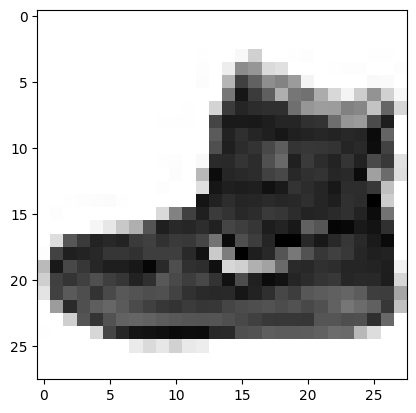

In [10]:
plt.imshow(X_train[0], cmap = "Greys")

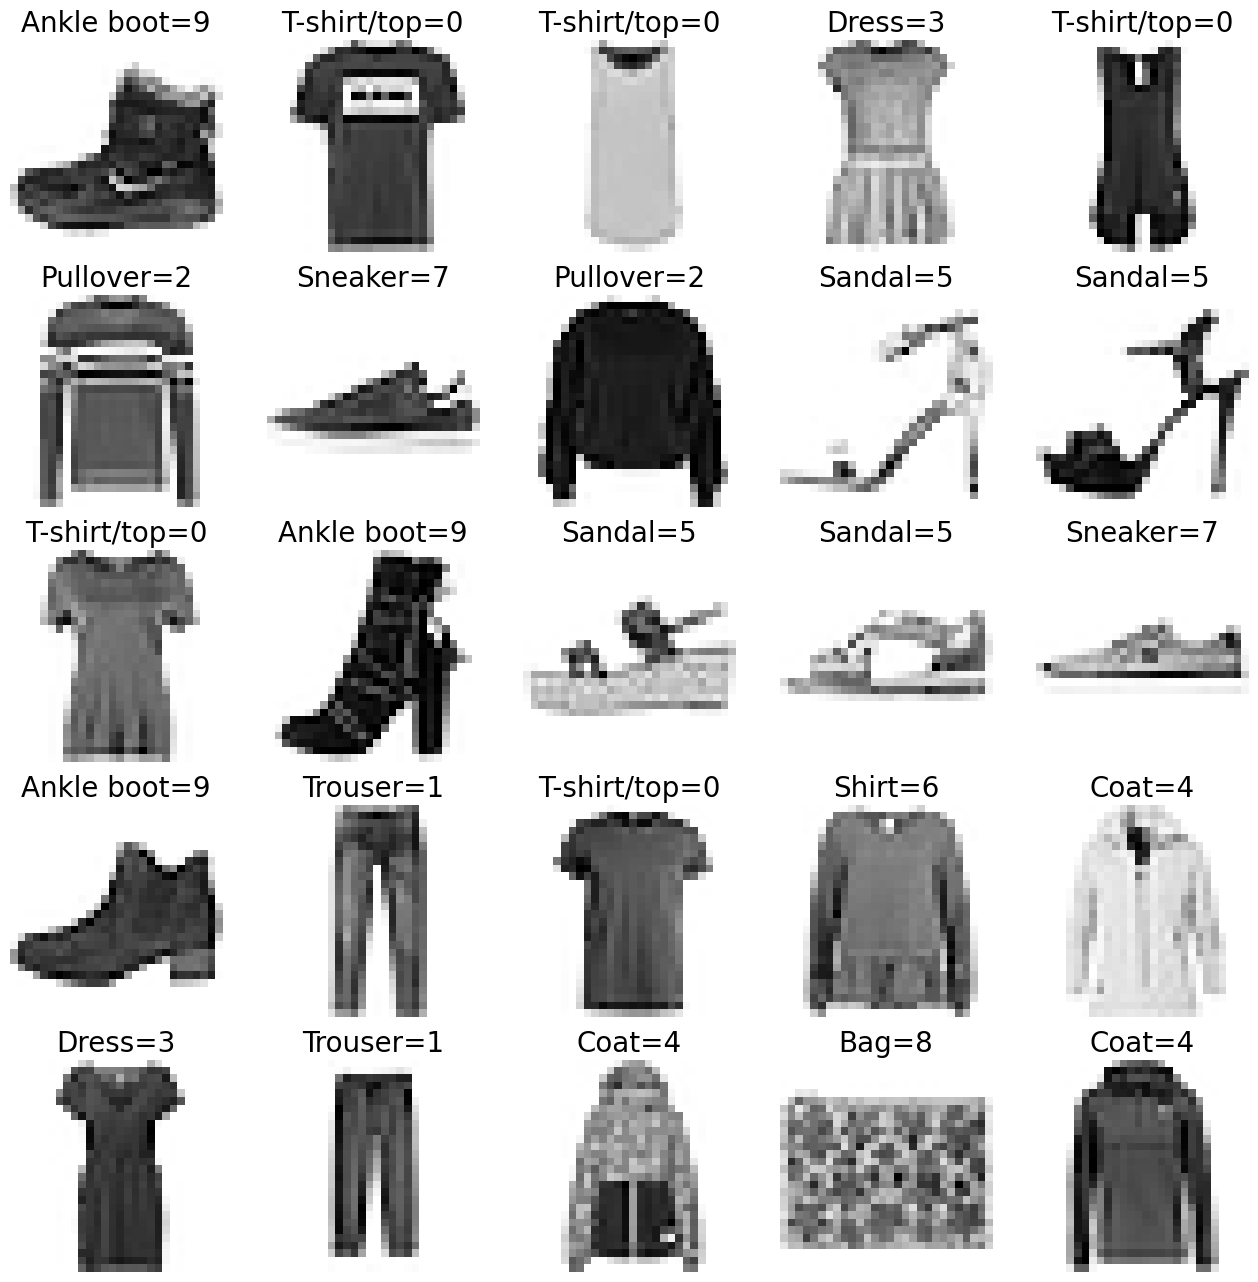

In [11]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

Feature Scaling

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Build Neural Network

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(units=32, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5538 - accuracy: 0.8061


In [29]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4192 - accuracy: 0.8521
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3821 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3600 - accuracy: 0.8719
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3420 - accuracy: 0.8791
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3285 - accuracy: 0.8812
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.8855
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3100 - accuracy: 0.8876
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.8907
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.290

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3665 - accuracy: 0.8716


[0.3665260374546051, 0.8715999722480774]

In [31]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [32]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
      dtype=float32)

In [33]:
np.argmax(y_pred[0].round(2))

9

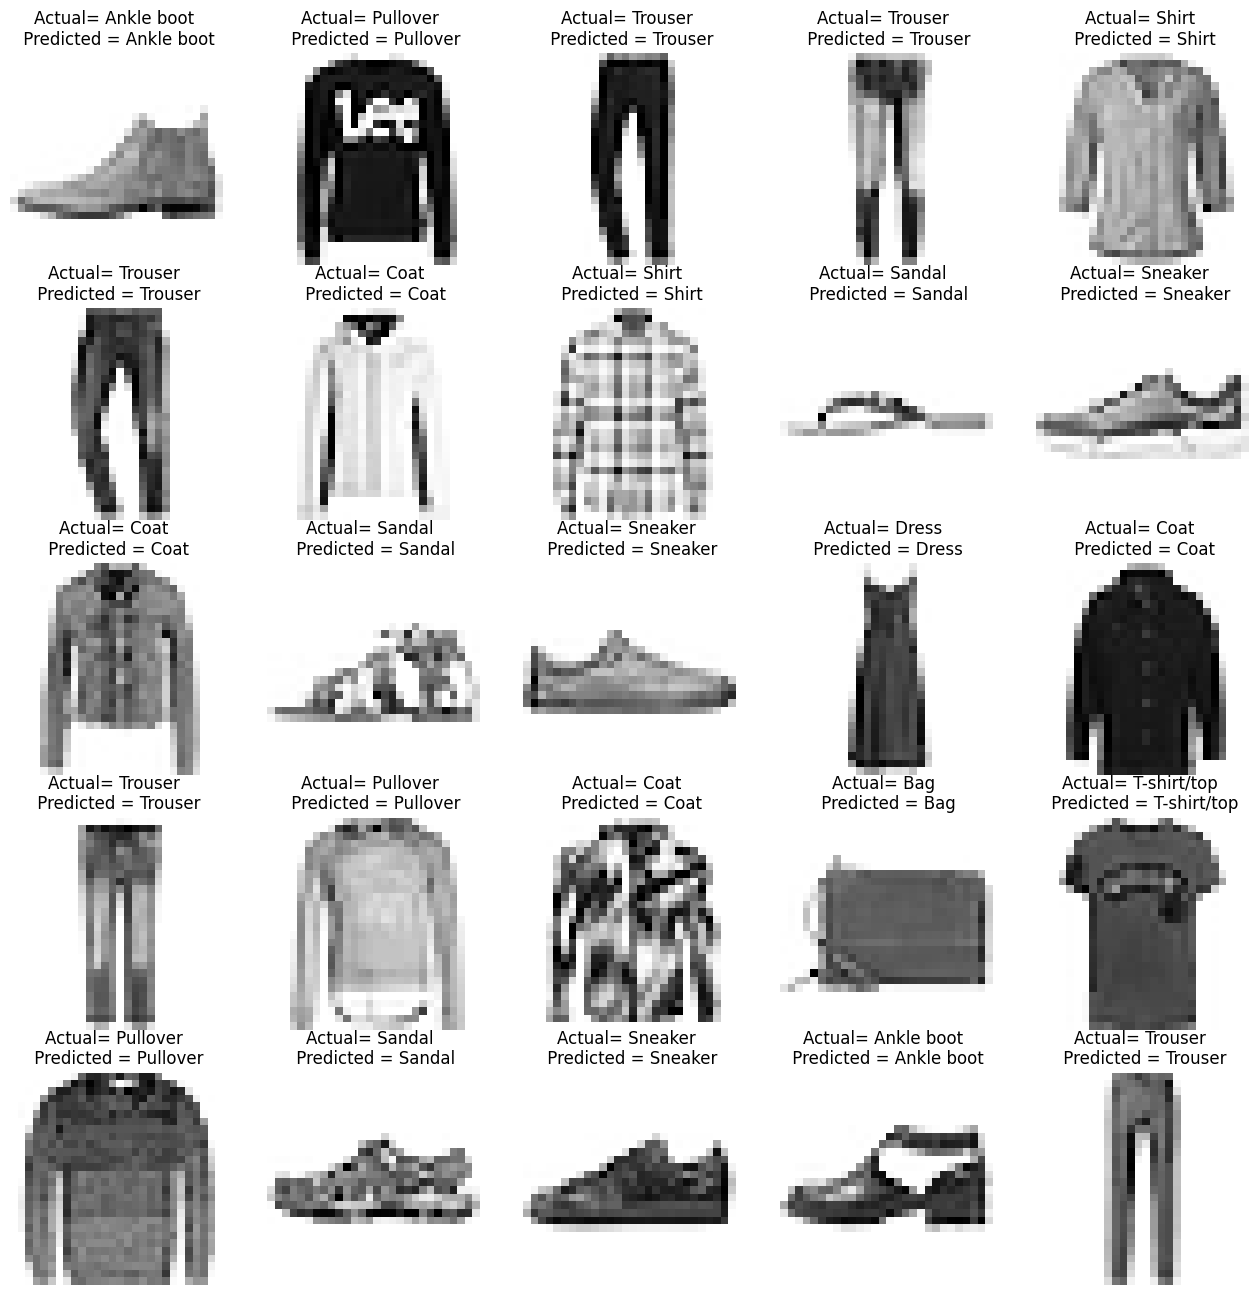

In [38]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i], cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}". format(class_labels[y_test[i]], class_labels[y_test[i]], class_labels [np. argmax (y_pred[i])]))

Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

<Axes: >

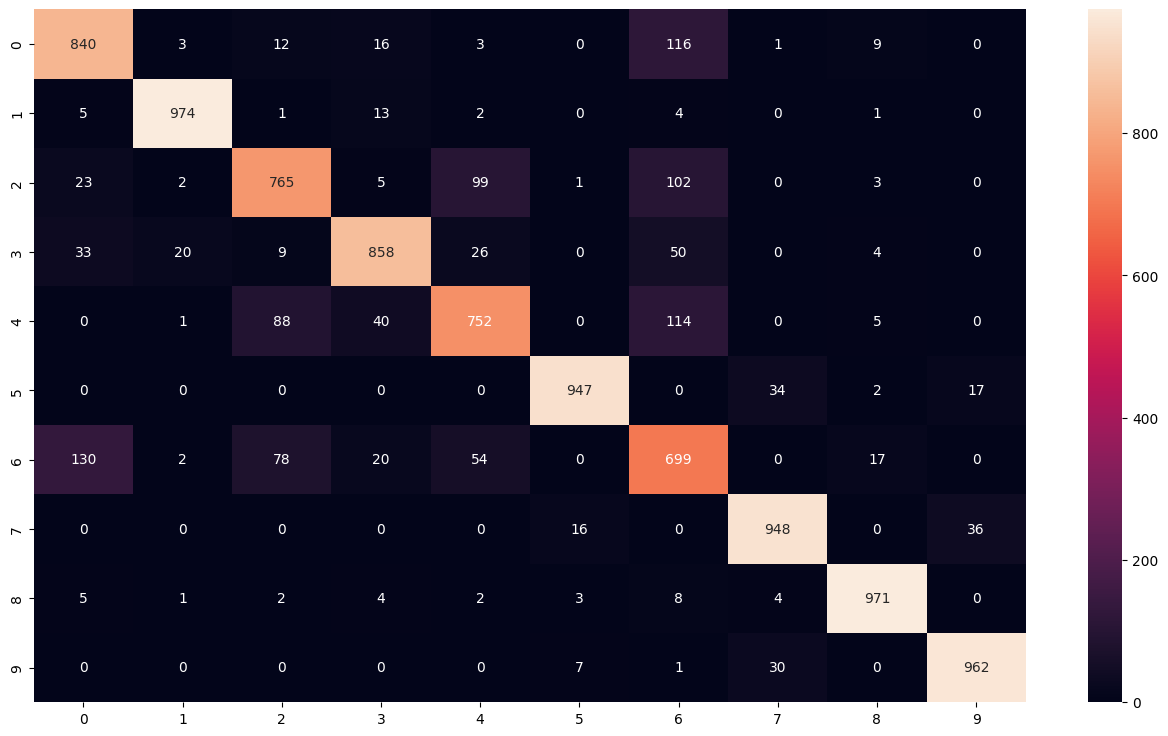

In [40]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

Classification Report

In [41]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)

In [42]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.84      0.83      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.80      0.77      0.78      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.80      0.75      0.78      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.64      0.70      0.67      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [44]:
model.save("MNIST_classifier_fashion_model.h5")

To directly use the whole model later on!

In [47]:
model = keras.models.load_model("MNIST_classifier_fashion_model.h5")

In [48]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[6.5340977e-09, 3.0483404e-11, 4.7999458e-09, ..., 8.3752200e-03,
        1.1193673e-05, 9.8778981e-01],
       [2.0346182e-04, 1.7708347e-10, 9.9576247e-01, ..., 1.5111593e-19,
        6.7029696e-08, 1.3385927e-20],
       [9.1893583e-07, 9.9999779e-01, 5.3618027e-07, ..., 7.8408723e-16,
        2.1813953e-10, 7.9587988e-14],
       ...,
       [3.1119696e-05, 6.7530713e-08, 3.1912961e-05, ..., 2.0238522e-09,
        9.9968696e-01, 5.6158390e-12],
       [4.1569962e-07, 9.9998015e-01, 2.8577674e-07, ..., 6.8635479e-12,
        2.2342174e-08, 1.3440246e-08],
       [7.4870986e-05, 3.1625872e-11, 1.8699420e-05, ..., 2.7511874e-03,
        9.4175353e-05, 1.9317455e-05]], dtype=float32)